##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

## <br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 1 DO LABORATORIUM 4</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Metoda gradientu prostego, perceptron</h1>
    <h1 style = "font-size:24px">Tomasz Neumann</h1>
    <h3 style = "font-size:21px">Stochastyczny gradient prosty, batch i mini-batch</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Przykład 1

Metoda gradientu prostego (<i>gradient descent</i>) polega na wielokrotnym poprawieniu wartości parametrów w celu zminimalizowania funkcji kosztu. W metodzie tej na początku inicjujemy losowymi wartościami wektor parametrów $\theta$, a następnie za pomocą 'małych kroków' dążymy do zredukowania funkcji kosztu (np. wspomnianej w poprzednim przykładzie MSE), aż do momentu uzyskania zbieżności algorytmu z wartością minimalną tejże funkcji.
W metodzie tej ważny jest rozmiar poszczególnych 'kroków', który opisywany jest za pomocą hiperparametru określanego jako współczynnik uczenia (<i>learning rate</i>). Przy wyborze tej wartości należy mieć na uwadze, aby nie była zbyt mała, gdyż algorytm wówczas będzie potrzebował bardzo dużo przebiegów do osiągnięcia oczekiwanej wartości, a co za tym idzie będzie to czasochłonne. Zbyt duża wartość może doprowadzić natomiast do sytuacji w której nastąpi przeoczenie minimum, jednocześnie znajdująć się po drugiej stronie tej doliny, nawet z wartością większą niż początkową, co w konsekwencji może doprowadzić do rozbieżności pracy algorytmu, a co za tym idzie, nie będzie mozna znaleźć rozwiązania.
Należy także mieć na uwadze wybór funkcji kosztu do minimalizacji, gdyż nie wszystkie mają 'ładny kształ' , posiadając minima lokalne, minima globalne i wypłaszczenia, co w przypadku różnych losowych inicjacji poczatkowych, może nie doprowadzić do osiągnięcia globalnego minimum.
W uczeniu maszynowym metoda spadku gradientu jest techniką optymalizacji używaną do obliczania parametrów modelu (współczynników i ich odchyleń standardowych) dla algorytmów takich jak regresja liniowa, regresja logistyczna, sieci neuronowe itp. W tej technice wykonuje się wielokrotnie iteracje prze zestaw uczący, aktualizując parametry modelu zgodnie z gradientem błędu w odniesieniu do zbioru uczacego.
W zależności od wielkości zbioru danych treningowych branych pod uwagę podczas aktualizacji parametrów modelu, możemy wyróżnić trzy podejścia:

<b>Batch Gradient Descent</b> - parametry są aktualizowane w oparciu o cały zestaw danych uczących (wykonanie pojedynczej aktualizacji zajmuje dużo czasu);

<b>Stochastic Gradient Descent</b>  - parametry są aktualizowane po obliczeniu gradientu błędu w oparciu o pojedynczy przykład treningowy (zapętlenie zestawu uczącego, a tym samym nie można wykorzystać w pełni prędkości obliczeń związanej z wektoryzacją kodu);

<b>Mini-Batch Gradient Descent</b>  -  parametry są aktualizowane po obliczeniu gradientu błędu w odniesieniu do podzbioru zbioru uczącego (może dokonywać szybkich aktualizacji wykorzystując także potencjał wektoryzacji kodu, jednak należy uważać na szybkie i chwilowe aktuaalizacje parametrów modelu w zalezności od przyjętego rozmiaru paczki danych).

Tak więc, <i>Mini-Batch Gradient Descent</i> stanowi kompromis między szybką zbieżnością a zakłóceniami związanymi z aktualizacją gradientu, co czyni go bardziej elastycznym i niezawodnym algorytmem.


W celu sprawdzenia tych trzech podejść można napisać prostą implementację kodu, który to zrelizuje za pomocą bibliotek numpy oraz matplotlib. Stworzone zostaną także dane syntetyczne do regresji liniowej (8000 przykładów danych, z których każdy ma po dwa atrybuty/cechy na podstawie wielowymiarowego rozkładu normalnego), oraz ich wizualizację. W tym kroku zostanie także dokonany podział całego zbioru danych na dane treningowe i testowe w stosunku 9:1. 


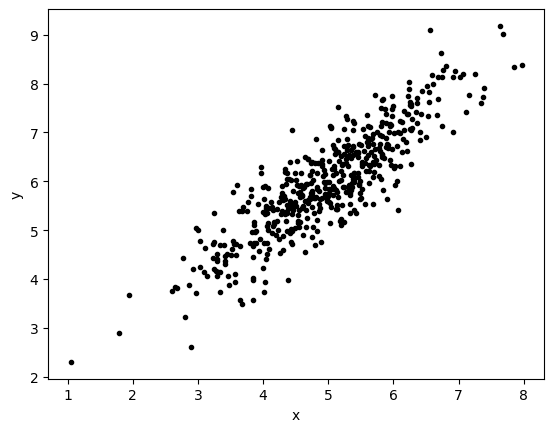

Liczba danych treningowych =  7200
Liczba danych testowych =  800


In [1]:
# Import podstawowych bibliotek języka Python
import numpy as np  # operacje numeryczne
import matplotlib  # wykresy i ich ustawienia
import matplotlib.pyplot as plt  # tworzenie wykresu
import time

# stworzenie danych
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
#stworzenie danych losowych z wielowymiarowego rozkładu normalnego
data = np.random.multivariate_normal(mean, cov, 8000)
# wizualizacja danych
plt.scatter(data[:500, 0], data[:500, 1], c = 'black', marker = '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
  
# podział danych na treningowe i testowe
data = np.hstack((np.ones((data.shape[0], 1)), data))
## współczynnik podziału 
split_factor = 0.90
split = int(split_factor * data.shape[0])
  
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))
  
print("Liczba danych treningowych = % d"%(X_train.shape[0]))
print("Liczba danych testowych = % d"%(X_test.shape[0]))

W kojenym kroku zostanie pokazany kod implementujący regresję liniową przy użyciu 'mini-paczek'. W tym przypadku funkcja gradientDescent() jest główną, a pozostałe są tylko pomocniczymi. Funkcja główna inicjuje parametry, oblicza najlepszy zestaw parametrów dla modelu i zwraca te parametry wraz z listą zawierającą historię błędów podczas aktualizowania parametrów. 

In [2]:
# regresja liniowa przy użyciu "mini-batch" w metodzie spadku gradientu
# funkcja do wyliczania predykcji
def hypothesis(X, theta):
    return np.dot(X, theta)
  
# funkcja wyliczająca gradient
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
  
# funkcja do wyliczania błędu i aktualnej wartości theta
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]
  
# funkcja tworzącą listę mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# funkcja główna wykonująca stochastyczny spadek gradientu z mini-batches
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 8):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
  
    return theta, error_list

W tym kroku nastapi wywołanie metody głównej, która obliczy parametry modelu oraz zostaną zwizualizowane zmiany funkcji błędu.

(7200, 2)
Czas wykonania: 0.24005770683288574
Bias =  [0.76345993]
Coefficients =  [[1.0449692]]


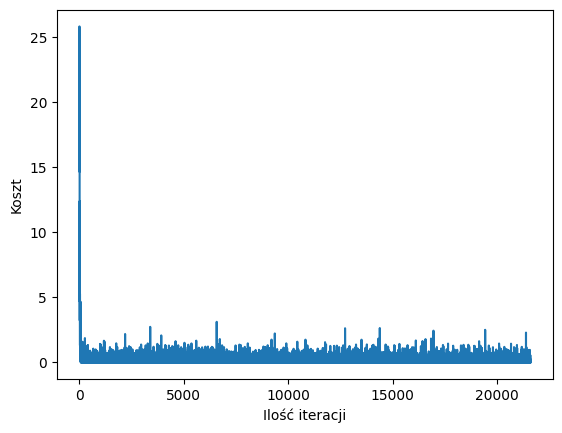

In [8]:
start = time.time()
print(X_train.shape)
theta, error_list = gradientDescent(X_train, y_train, learning_rate = 0.001, batch_size = 1)
end = time.time()
print(f"Czas wykonania: {end-start}")
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])
  
# wizualizacja spadku gradientu z mini-batches
plt.plot(error_list)
plt.xlabel("Ilość iteracji")
plt.ylabel("Koszt")
plt.show()

Ostatecznie należy przeprowadzić predekcję na zbiorze testowym oraz obliczyć średni błąd bezwględny z wykonanych prognoz.

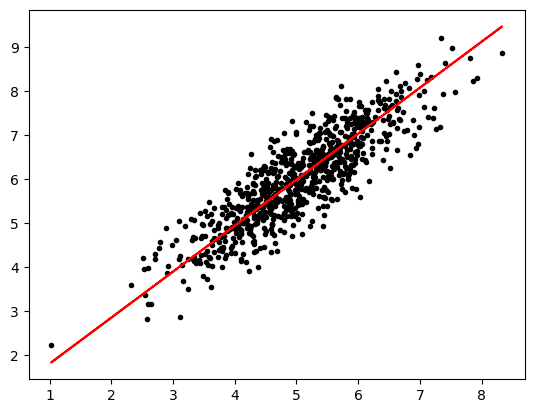

MAE =  0.42891414160023444
MSE =  0.2896689010378908


In [9]:
# predykcja na zbiorze testowym
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], c = "black", marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'red')
plt.show()

# wyliczenie MAE z predykcji
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("MAE = ", error)
mse = np.square(np.subtract(y_test, y_pred)).mean()
print("MSE = ", mse)

Czerwona linia powyżej reprezentuje wyznaczoną hipotetyczną funkcję liniową do danych testowych postaci : $\theta_0 + \theta_1 *X_{test(:,1)} + \theta_2 *X_{test(:,2)} = 0$.

# Zadania do wykonania

<p><b>Zadanie 1</b></p>
Przeprowadź i przeanalizuj eksperymenty dla różnych wartości mini-batches, tak aby przetestować podeścia opisane we wstępie tego notatnika.

<p><b>Zadanie 2</b></p>
Przeprowadź i przeanalizuj eksperymenty dla różnych współczynników uczenia przy ustalonej wartości mini-batches (liczba mini-batches składająca się z dwóch ostatnich cyfr numeru albumu).

![stopka.svg](stopka.svg)

batch_size:  25
Czas wykonania: 0.03300738334655762
Bias =  [0.76181432]
Coefficients =  [[1.0377619]]
batch_size:  50
Czas wykonania: 0.028006553649902344
Bias =  [0.76135811]
Coefficients =  [[1.01755808]]
batch_size:  75
Czas wykonania: 0.026006221771240234
Bias =  [-375.66876467]
Coefficients =  [[-1837.8761997]]
batch_size:  100
Czas wykonania: 0.02400517463684082
Bias =  [-2.54490724e+49]
Coefficients =  [[-1.28409038e+50]]
batch_size:  125
Czas wykonania: 0.024005889892578125
Bias =  [8.39756119e+63]
Coefficients =  [[4.38098207e+64]]
batch_size:  150
Czas wykonania: 0.024004697799682617
Bias =  [-1.86035362e+69]
Coefficients =  [[-9.71068994e+69]]


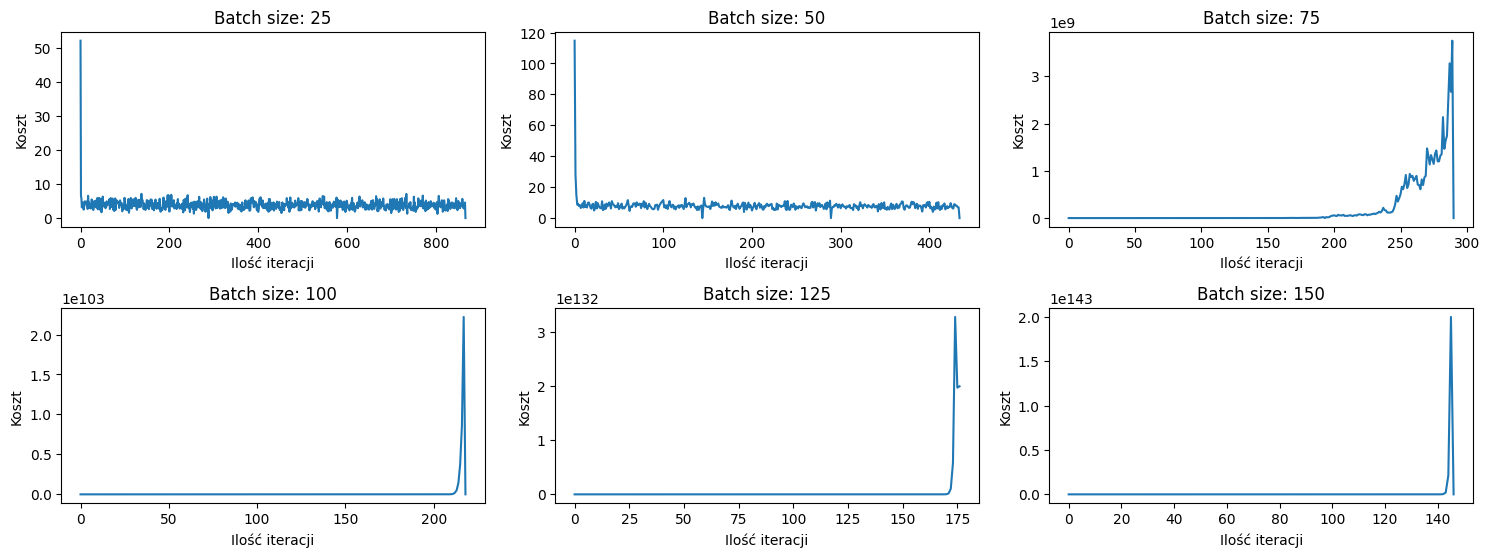

In [5]:
# Zadanie 1
b_size = np.arange(25,175,25)
theta_list = []
error_list = []
for batch_size in b_size:
    start = time.time()
    theta, error = gradientDescent(X_train, y_train, learning_rate = 0.001, batch_size = batch_size)
    end = time.time()
    print("batch_size: ", batch_size)
    print(f"Czas wykonania: {end-start}")
    print("Bias = ", theta[0])
    print("Coefficients = ", theta[1:])    
    print("==============================")     
    theta_list.append(theta)
    error_list.append(error)
plt.figure(figsize=(15,8))
for i,error in enumerate(error_list):
    plt.subplot(3,3,i+1)
    plt.plot(error)
    plt.title(f"Batch size: {b_size[i]}")
    plt.xlabel("Ilość iteracji")
    plt.ylabel("Koszt")
    plt.tight_layout()
plt.show()

Learning rate  0.001
Czas wykonania: 0.31107020378112793
Bias =  [0.76118213]
Coefficients =  [[1.04328346]]
Learning rate  0.101
Czas wykonania: 0.2450573444366455
Bias =  [0.76527397]
Coefficients =  [[1.04697928]]
Learning rate  0.201
Czas wykonania: 0.24405264854431152
Bias =  [0.76077361]
Coefficients =  [[1.03029724]]
Learning rate  0.30100000000000005
Czas wykonania: 0.24405550956726074
Bias =  [0.75638273]
Coefficients =  [[1.02188304]]
Learning rate  0.401
Czas wykonania: 0.2430567741394043
Bias =  [0.76253007]
Coefficients =  [[1.04672131]]
Learning rate  0.501
Czas wykonania: 0.2410564422607422
Bias =  [0.76588966]
Coefficients =  [[1.05987961]]
Learning rate  0.6010000000000001
Czas wykonania: 0.24305510520935059
Bias =  [0.75343248]
Coefficients =  [[1.04119463]]
Learning rate  0.7010000000000001
Czas wykonania: 0.2470555305480957
Bias =  [0.75845338]
Coefficients =  [[1.03554574]]
Learning rate  0.801
Czas wykonania: 0.24405765533447266
Bias =  [0.76039012]
Coefficients =

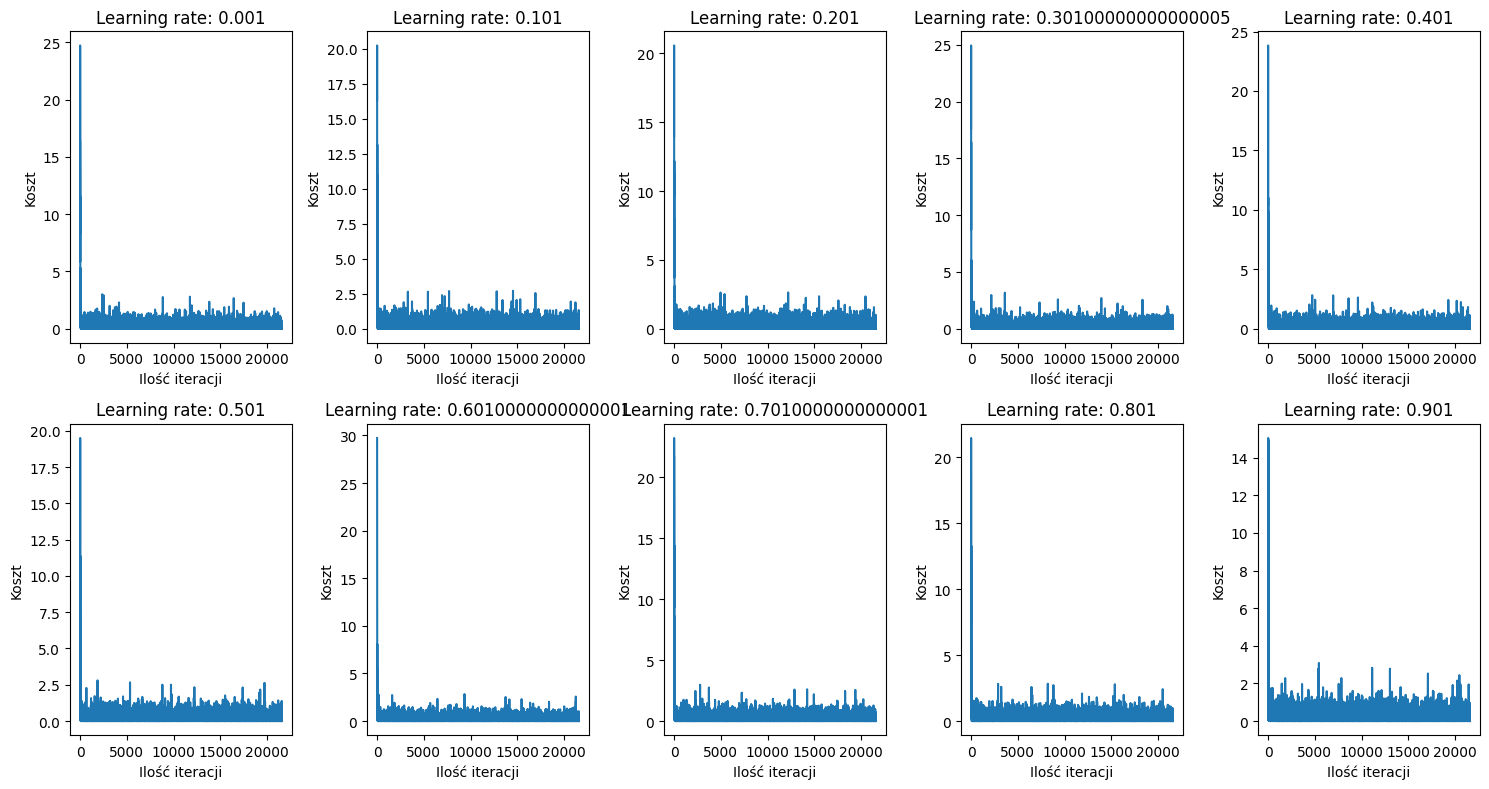

MAE =  0.42889194304639056
MSE =  0.28917677165523364
MAE =  0.4291738870449344
MSE =  0.2905210461910795
MAE =  0.4319536886500641
MSE =  0.2908049055112881
MAE =  0.4380853218380305
MSE =  0.29753423118405364
MAE =  0.429090935178047
MSE =  0.2902900812872076
MAE =  0.43613469688763584
MSE =  0.3008411720530412
MAE =  0.42936612529972423
MSE =  0.28903952928234056
MAE =  0.43025530522722744
MSE =  0.2892652413885974
MAE =  0.42918319431812635
MSE =  0.28876850545234456
MAE =  0.43233399426429187
MSE =  0.29113897307511466


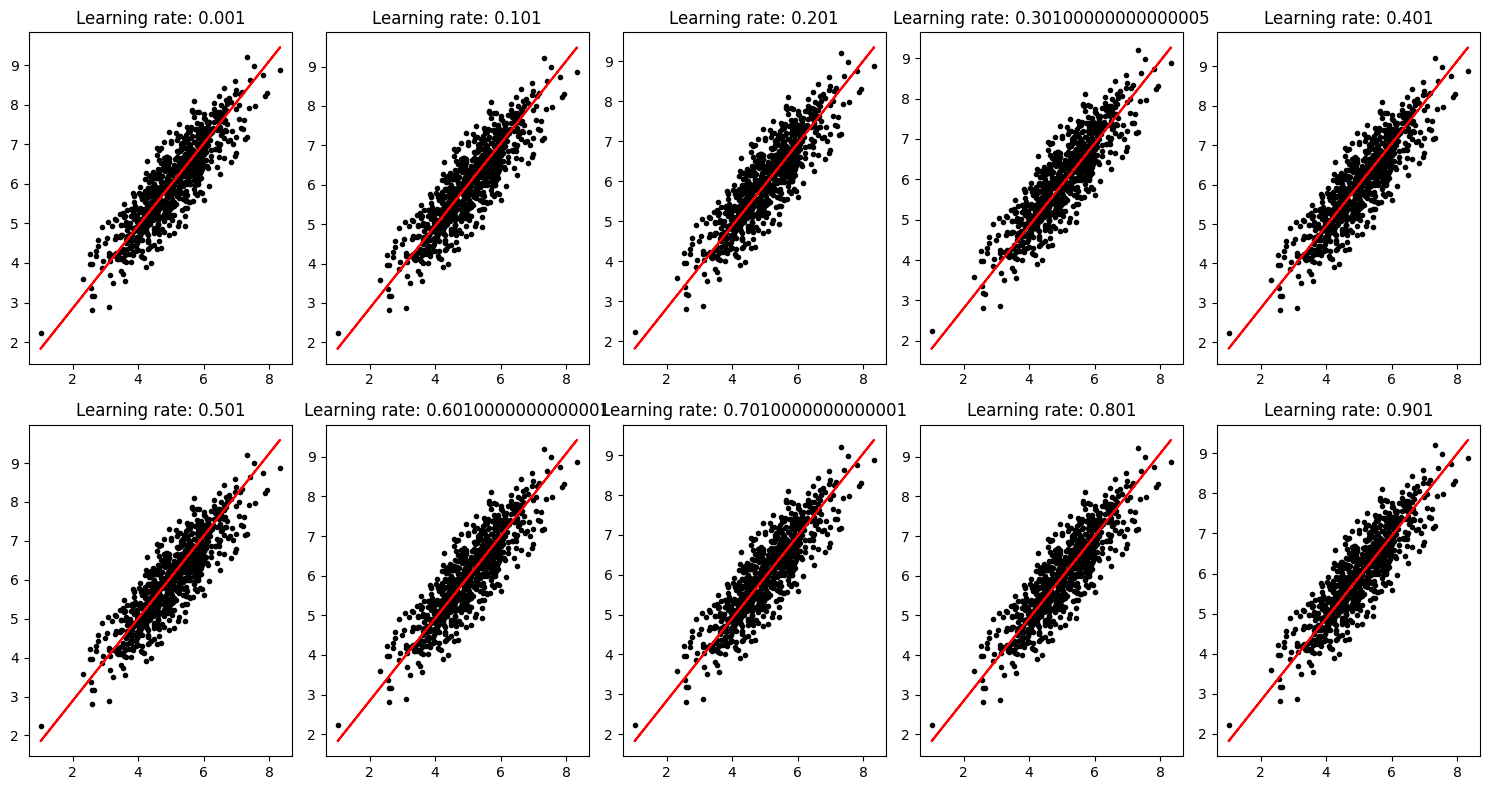

In [ ]:
# Zadanie 2
# Indeks = 188982
BATCH_SIZE = 1
learning_rate = np.arange(0.001,1,0.1)
theta_list = []
error_list = []
predictions = []
for l_rate in learning_rate:
    start = time.time()
    theta, error = gradientDescent(X_train, y_train, learning_rate = 0.001, batch_size = BATCH_SIZE)
    end = time.time()
    print("Learning rate ", l_rate)
    print(f"Czas wykonania: {end-start}")
    print("Bias = ", theta[0])
    print("Coefficients = ", theta[1:])    
    print("==============================")     
    theta_list.append(theta)
    error_list.append(error)
    predictions.append(hypothesis(X_test, theta))

plt.figure(figsize=(15,8))
for i,error in enumerate(error_list):
    plt.subplot(2,5,i+1)
    plt.plot(error)
    plt.title(f"Learning rate: {learning_rate[i]}")
    plt.xlabel("Ilość iteracji")
    plt.ylabel("Koszt")
    plt.tight_layout()
plt.show()

# plt.figure(figsize=(15,8))
# for i,pred in enumerate(predictions):
#     plt.subplot(2,5,i+1)
#     plt.title(f"Learning rate: {learning_rate[i]}")
#     plt.scatter(X_test[:, 1], y_test[:, ], c = "black", marker = '.')
#     plt.plot(X_test[:, 1], pred, color = 'red')
#     plt.tight_layout()
#     error = np.sum(np.abs(y_test - pred) / y_test.shape[0])
#     print("MAE = ", error)
#     mse = np.square(np.subtract(y_test, pred)).mean()
#     print("MSE = ", mse)
# plt.show()